In [14]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math
from tabulate import tabulate

In [15]:
dir = "p_date=2023-01-12-09_00_59"

In [16]:
path = f'../../output/weights/{dir}/evaluate/metrics.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

games = data["games"]

print(f"Games: {games}")

Games: 1000


In [17]:
def plot_stats(data, games):

    actions_top = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", ]
    actions_bottom = ["FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFE", "FINISH_CHANCE"]

    game_id = 0

    points_top_list = []
    points_bottom_list = []

    points_top = 0
    points_bottom = 0

    zero_top = 0
    zero_bottom = 0

    for a in data["actions"]:
        if game_id != a["game_id"]:
            points_top_list.append(points_top)
            points_bottom_list.append(points_bottom)

            if points_top == 0:
                zero_top += 1
            if points_bottom == 0:
                zero_bottom += 1

            points_top = 0
            points_bottom = 0

            game_id = a["game_id"]
        else:
            if a["action"] in actions_top:
                points_top += a["points"]
            elif a["action"] in actions_bottom:
                points_bottom += a["points"]

    table = []
    table.append(["Top - max", max(points_top_list)])
    table.append([f"Top - min ({zero_top})", min(points_top_list)])
    table.append(["Top - mean", stat.mean(points_top_list)])
    table.append(["Top - bonus", len([x for x in points_top_list if x >= 63])])
    
    table.append(["Bottom - max", max(points_bottom_list)])
    table.append([f"Bottom - min ({zero_bottom})", min(points_bottom_list)])
    table.append(["Bottom - mean", stat.mean(points_bottom_list)])
    
    print (tabulate(table, headers=["Metric", "Value"]))
    

In [18]:
plot_stats(data, games)

Metric              Value
----------------  -------
Top - max          62
Top - min (2)       0
Top - mean         33.129
Top - bonus         0
Bottom - max      172
Bottom - min (2)    0
Bottom - mean      97.684


In [19]:
def plot_bottom_action(data, games):
    counter = 0
    points = []

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", "FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFE", "FINISH_CHANCE"]

    actions_dict = {}

    for a in data["actions"]:
        action = a["action"]

        if action not in actions_dict:
            actions_dict[action] = {}
            actions_dict[action]["counter"] = 0
            actions_dict[action]["points"] = []
        else:
            actions_dict[action]["counter"] += 1
            actions_dict[action]["points"].append(a["points"])
    
    for action in actions:
        if action in actions_dict:
            counter = actions_dict[action]["counter"]
            points = actions_dict[action]["points"]

            if action in ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES"]:
                plt.hist(points, bins=5, edgecolor='black', linewidth=1.2,)
            else:
                plt.hist(points, bins=30, edgecolor='black', linewidth=1.2,)

            plt.title(f"{action} - {counter / games * 100}%")
            plt.show()

            print(f"Used ({action}): {counter} - {counter / games * 100}%")
            print(f"Not Used ({action}): {games - counter} - {(games - counter) / (games) * 100}%")
            print("------------------")

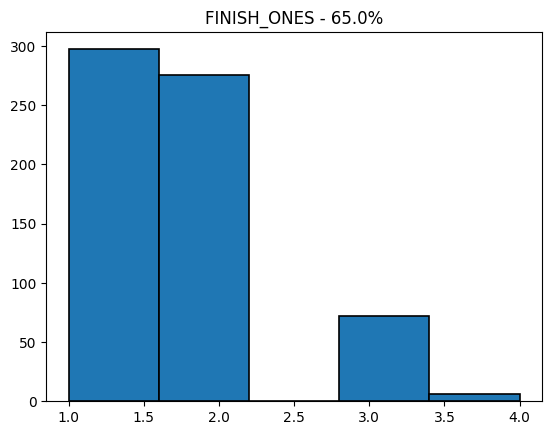

Used (FINISH_ONES): 650 - 65.0%
Not Used (FINISH_ONES): 350 - 35.0%
------------------


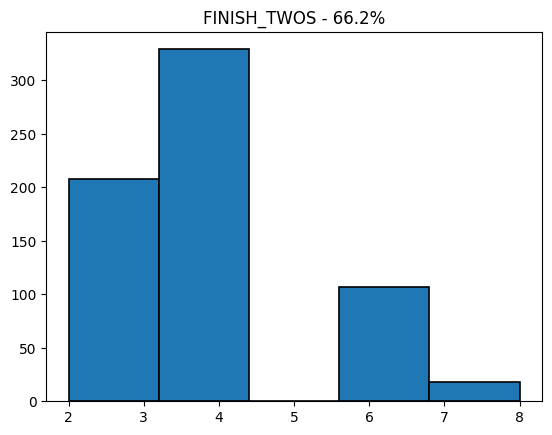

Used (FINISH_TWOS): 662 - 66.2%
Not Used (FINISH_TWOS): 338 - 33.800000000000004%
------------------


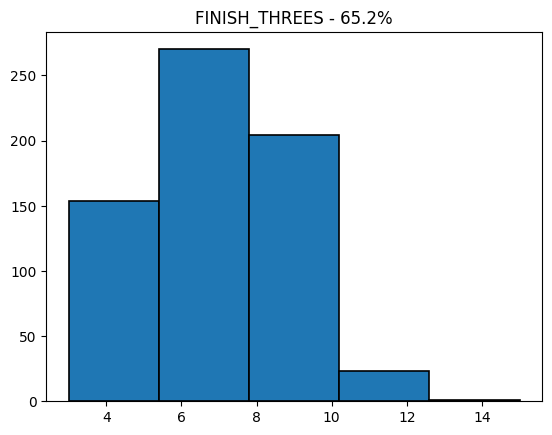

Used (FINISH_THREES): 652 - 65.2%
Not Used (FINISH_THREES): 348 - 34.8%
------------------


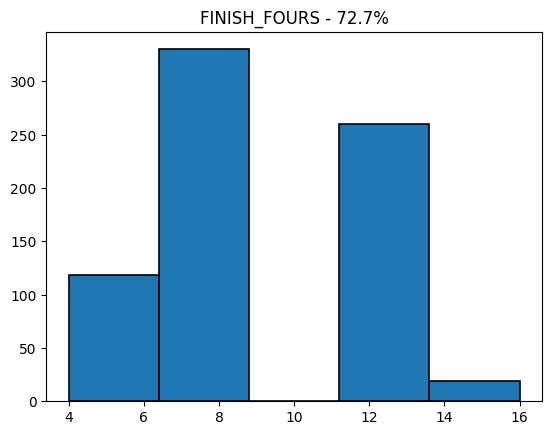

Used (FINISH_FOURS): 727 - 72.7%
Not Used (FINISH_FOURS): 273 - 27.3%
------------------


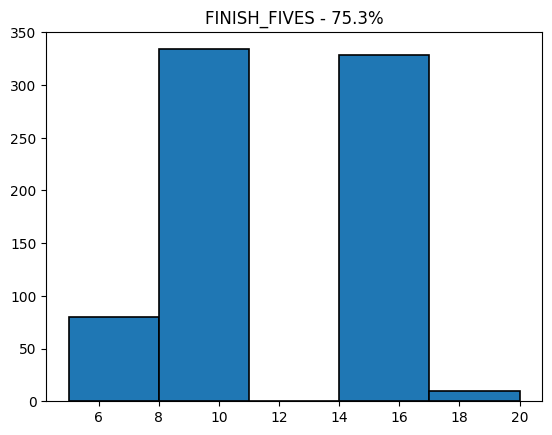

Used (FINISH_FIVES): 753 - 75.3%
Not Used (FINISH_FIVES): 247 - 24.7%
------------------


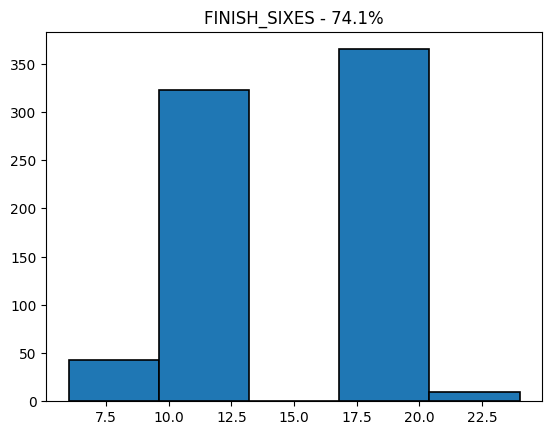

Used (FINISH_SIXES): 741 - 74.1%
Not Used (FINISH_SIXES): 259 - 25.900000000000002%
------------------


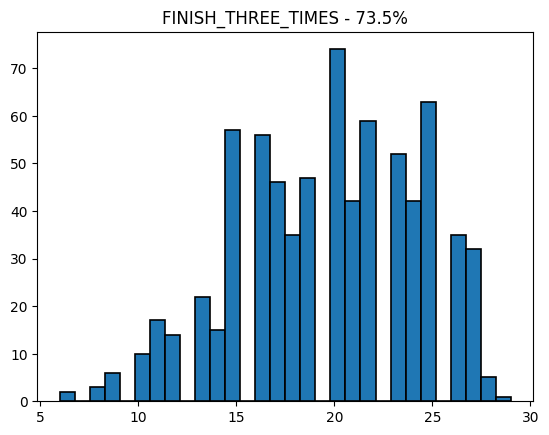

Used (FINISH_THREE_TIMES): 735 - 73.5%
Not Used (FINISH_THREE_TIMES): 265 - 26.5%
------------------


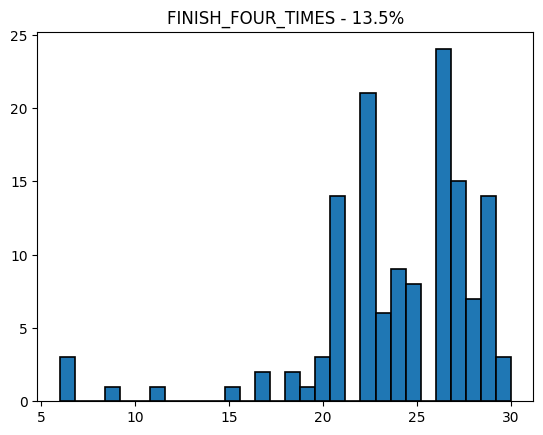

Used (FINISH_FOUR_TIMES): 135 - 13.5%
Not Used (FINISH_FOUR_TIMES): 865 - 86.5%
------------------


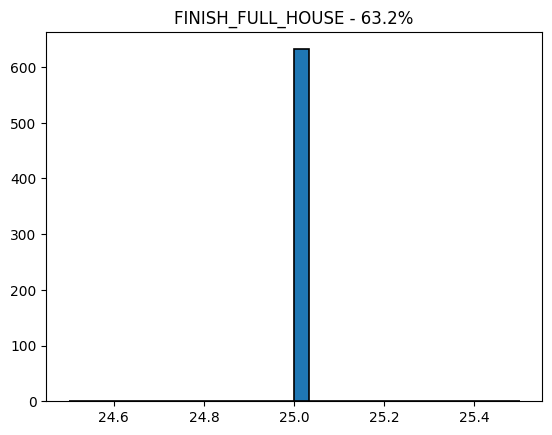

Used (FINISH_FULL_HOUSE): 632 - 63.2%
Not Used (FINISH_FULL_HOUSE): 368 - 36.8%
------------------


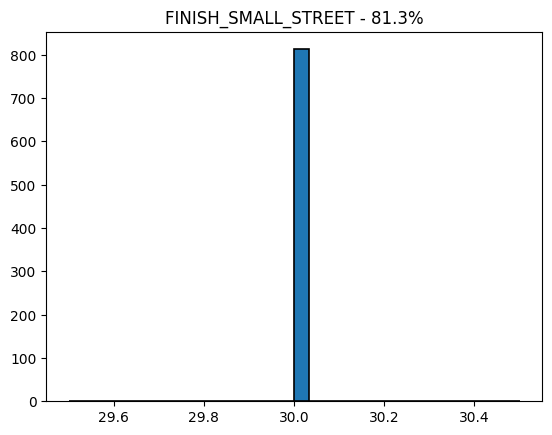

Used (FINISH_SMALL_STREET): 813 - 81.3%
Not Used (FINISH_SMALL_STREET): 187 - 18.7%
------------------


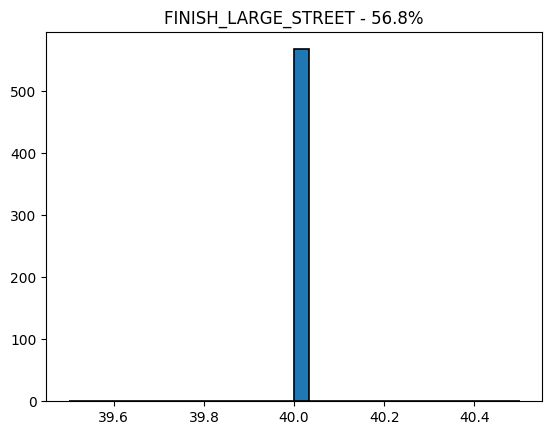

Used (FINISH_LARGE_STREET): 568 - 56.8%
Not Used (FINISH_LARGE_STREET): 432 - 43.2%
------------------


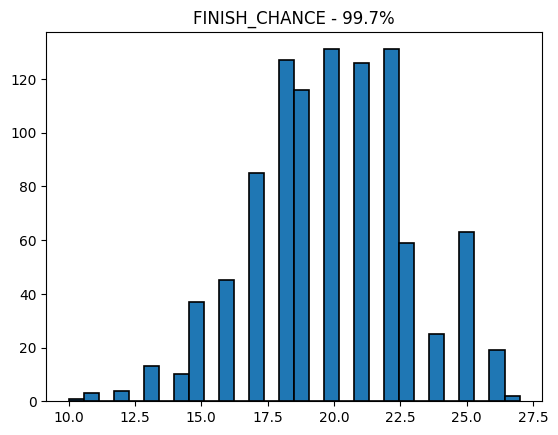

Used (FINISH_CHANCE): 997 - 99.7%
Not Used (FINISH_CHANCE): 3 - 0.3%
------------------


In [20]:
plot_bottom_action(data, games)

In [21]:
def plot_top_action(data, action, games):
    counter = 0
    dices = []

    scaler = 1

    for a in data["actions"]:
        if a["action"] == action:
            counter += 1

            if action == "FINISH_ONES":
                dices.append(int(a["points"] / 1))
                scaler = 1
            if action == "FINISH_TWOS":
                dices.append(int(a["points"] / 2))
                scaler = 2
            if action == "FINISH_THREES":
                dices.append(int(a["points"] / 3))
                scaler = 3
            if action == "FINISH_FOURS":
                dices.append(int(a["points"] / 4))
                scaler = 4
            if action == "FINISH_FIVES":
                dices.append(int(a["points"] / 5))
                scaler = 5
            if action == "FINISH_SIXES":
                dices.append(int(a["points"] / 6))
                scaler = 6
    
    dices += [0] * (games - counter)
    # print(dices)
    plt.hist(dices, bins=5)
    plt.title(action)
    plt.show()

    print(f"Min: {min(dices)}")
    print(f"Max: {max(dices)} (points: {max(dices) * scaler})")

In [22]:
from tabulate import tabulate

def plot_bottom_action_binary(data, games):

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", "FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFFEL", "FINISH_CHANCE"]
    
    table = []

    for action in actions:

        counter = 0

        for a in data["actions"]:
            if a["action"] == action:
                counter += 1
                
        table.append([action, counter, games - counter, str(round(counter / games * 100)) + "%"])
    
    print (tabulate(table, headers=["Action", "Used", "Not used", "%"]))
    

In [23]:


def plot_top(data, games):

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES"]
    
    table = []

    for action in actions:

        counter = 0

        dice_1 = 0
        dice_2 = 0
        dice_3 = 0
        dice_4 = 0
        dice_5 = 0

        for a in data["actions"]:
            if a["action"] == action:
                counter += 1

                dices = 0
                if action == "FINISH_ONES":
                    dices = int(a["points"] / 1)
                if action == "FINISH_TWOS":
                    dices = int(a["points"] / 2)
                if action == "FINISH_THREES":
                    dices = int(a["points"] / 3)
                if action == "FINISH_FOURS":
                    dices = int(a["points"] / 4)
                if action == "FINISH_FIVES":
                    dices = int(a["points"] / 5)
                if action == "FINISH_SIXES":
                    dices = int(a["points"] / 6)
                
                if (dices == 1):
                    dice_1 += 1
                if (dices == 2):
                    dice_2 += 1
                if (dices == 3):
                    dice_3 += 1
                if (dices == 4):
                    dice_4 += 1
                if (dices == 5):
                    dice_5 += 1

        str_dice_1 = str(dice_1) + " - " + str(round((dice_1 / games) * 100)) + "%"
        str_dice_2 = str(dice_2) + " - " + str(round((dice_2 / games) * 100)) + "%"
        str_dice_3 = str(dice_3) + " - " + str(round((dice_3 / games) * 100)) + "%"
        str_dice_4 = str(dice_4) + " - " + str(round((dice_4 / games) * 100)) + "%"
        str_dice_5 = str(dice_5) + " - " + str(round((dice_5 / games) * 100)) + "%"

        str_dice_0 = str((games - counter)) + " - " + str(round(((games - counter) / games) * 100)) + "%"

        table.append([action, str_dice_0, str_dice_1, str_dice_2, str_dice_3, str_dice_4, str_dice_5])
    
    print (tabulate(table, headers=["Action", "Dice 0", "Dice 1", "Dice 2", "Dice 3", "Dice 4", "Dice 5"]))
    

In [24]:
plot_top(data, games)

Action         Dice 0     Dice 1     Dice 2     Dice 3     Dice 4    Dice 5
-------------  ---------  ---------  ---------  ---------  --------  --------
FINISH_ONES    349 - 35%  297 - 30%  276 - 28%  72 - 7%    6 - 1%    0 - 0%
FINISH_TWOS    337 - 34%  209 - 21%  329 - 33%  107 - 11%  18 - 2%   0 - 0%
FINISH_THREES  347 - 35%  154 - 15%  270 - 27%  205 - 20%  23 - 2%   1 - 0%
FINISH_FOURS   272 - 27%  118 - 12%  331 - 33%  260 - 26%  19 - 2%   0 - 0%
FINISH_FIVES   246 - 25%  80 - 8%    335 - 34%  329 - 33%  10 - 1%   0 - 0%
FINISH_SIXES   258 - 26%  44 - 4%    323 - 32%  365 - 36%  10 - 1%   0 - 0%


In [25]:
plot_bottom_action_binary(data, games)

Action                 Used    Not used  %
-------------------  ------  ----------  ----
FINISH_ONES             651         349  65%
FINISH_TWOS             663         337  66%
FINISH_THREES           653         347  65%
FINISH_FOURS            728         272  73%
FINISH_FIVES            754         246  75%
FINISH_SIXES            742         258  74%
FINISH_THREE_TIMES      736         264  74%
FINISH_FOUR_TIMES       136         864  14%
FINISH_FULL_HOUSE       633         367  63%
FINISH_SMALL_STREET     814         186  81%
FINISH_LARGE_STREET     569         431  57%
FINISH_KNIFFEL            0        1000  0%
FINISH_CHANCE           998           2  100%


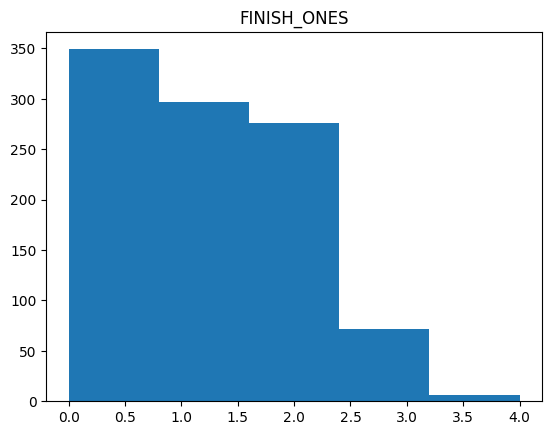

Min: 0
Max: 4 (points: 4)


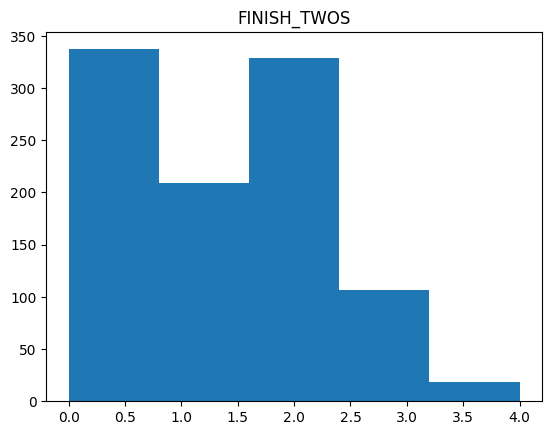

Min: 0
Max: 4 (points: 8)


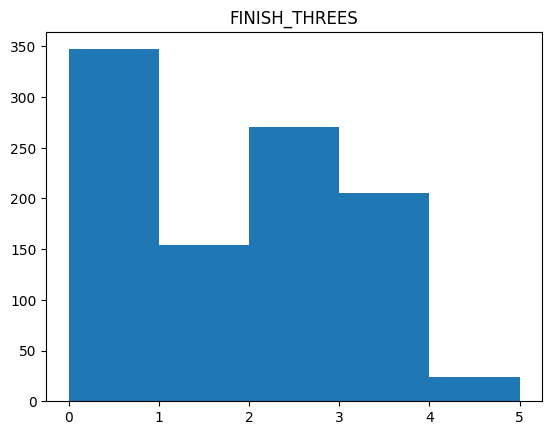

Min: 0
Max: 5 (points: 15)


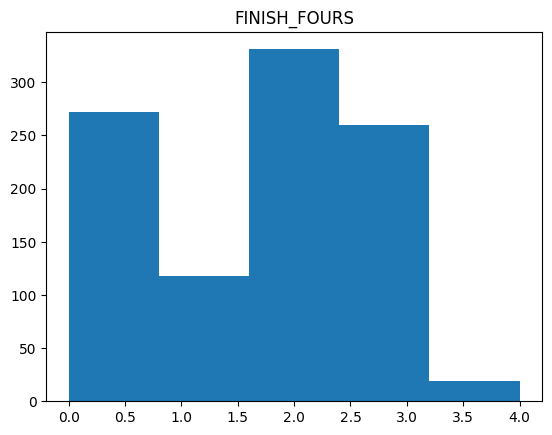

Min: 0
Max: 4 (points: 16)


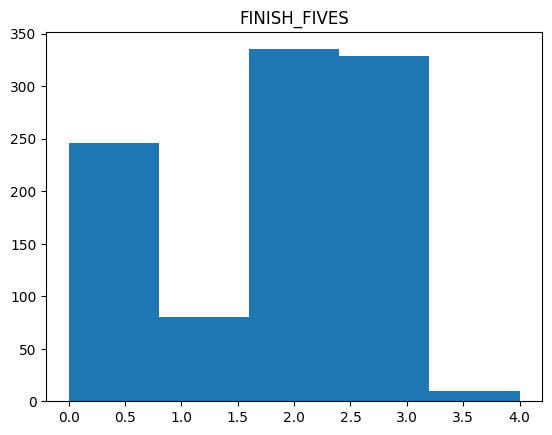

Min: 0
Max: 4 (points: 20)


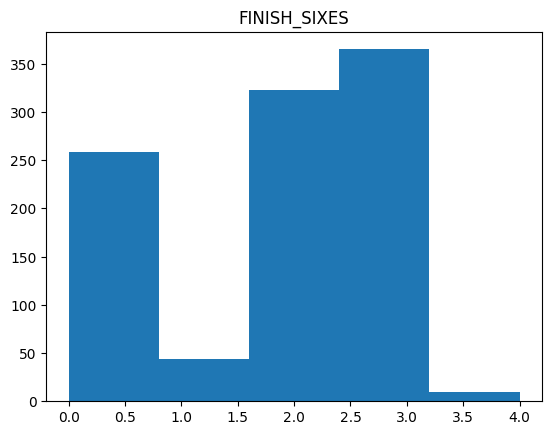

Min: 0
Max: 4 (points: 24)


In [26]:
plot_top_action(data, "FINISH_ONES", games)
plot_top_action(data, "FINISH_TWOS", games)
plot_top_action(data, "FINISH_THREES", games)
plot_top_action(data, "FINISH_FOURS", games)
plot_top_action(data, "FINISH_FIVES", games)
plot_top_action(data, "FINISH_SIXES", games)